In [3]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [4]:
# -----------------------------
# 2. Load Processed Dataset
# -----------------------------
# (Produced from 02_Feature_Engineering.ipynb)
df = pd.read_csv("Processed_Dataset.csv")

print("Dataset Loaded Successfully")
print(df.head())
print("Shape:", df.shape)


Dataset Loaded Successfully
   stops  class  duration  days_left  price  airline_AirAsia  \
0      0      0      2.17          1   5953                0   
1      0      0      2.33          1   5953                0   
2      0      0      2.17          1   5956                1   
3      0      0      2.25          1   5955                0   
4      0      0      2.33          1   5955                0   

   airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  ...  \
0                  0                 0               0                 1  ...   
1                  0                 0               0                 1  ...   
2                  0                 0               0                 0  ...   
3                  0                 0               0                 0  ...   
4                  0                 0               0                 0  ...   

   arrival_Evening  arrival_Late_Night  arrival_Morning  arrival_Night  \
0                0        

In [5]:
# -----------------------------
# 3. Split Features & Target
# -----------------------------
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (60030, 34)
Test set shape: (240123, 34)


In [6]:
# -----------------------------
# 4. Train Base Random Forest Model
# -----------------------------
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

print("Base Model Training Completed")

Base Model Training Completed


In [7]:
# -----------------------------
# 5. Model Evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("\n--- Base Model Performance ---")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))


--- Base Model Performance ---
R2 Score: 0.981735897013655
MAE: 1397.9862076483914
MSE: 9416846.602742193
RMSE: 3068.688091472021


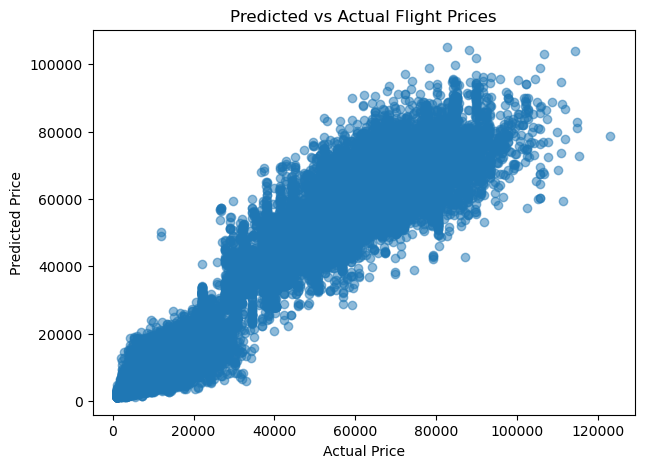

In [8]:
# -----------------------------
# 6. Plot Predicted vs Actual
# -----------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Flight Prices")
plt.show()

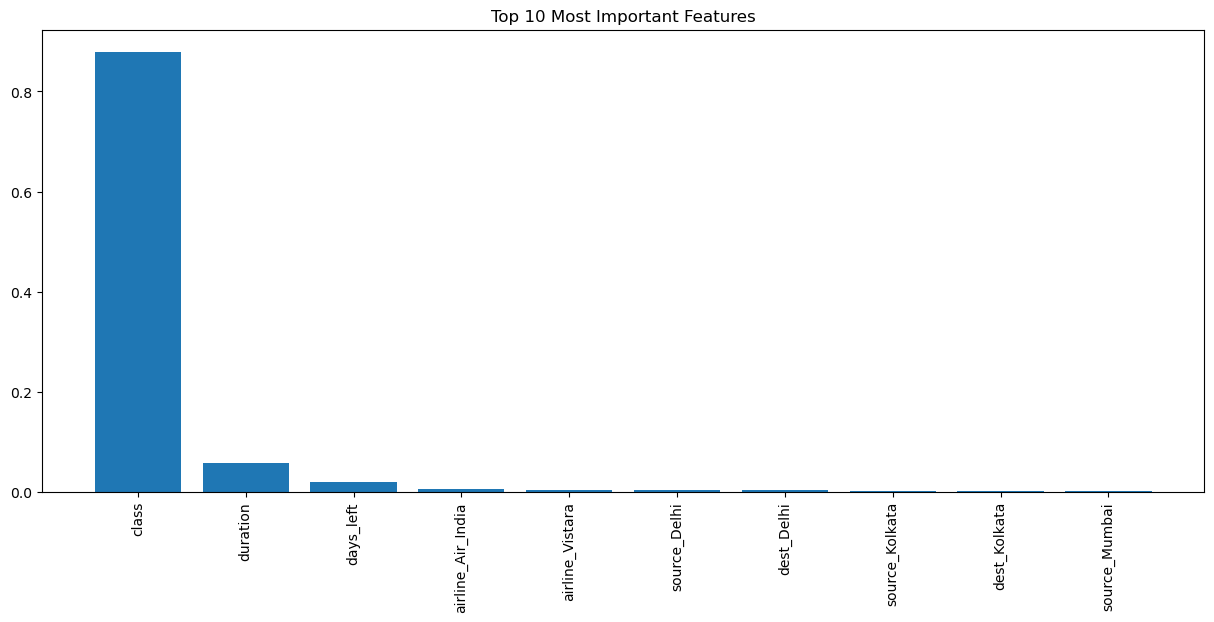

In [9]:
# -----------------------------
# 7. Feature Importance
# -----------------------------
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])
plt.title("Top 10 Most Important Features")
plt.xticks(rotation=90)
plt.show()

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

reg = RandomForestRegressor(n_jobs=-1, random_state=42)

param_dist = {
    'n_estimators': randint(200, 600),      
    'max_depth': [10, 20, 30, None],     
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    reg,
    param_distributions=param_dist,
    n_iter=20,        # Try 20 random combinations 
    cv=3,             # 3-fold for speed
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002363FC42540>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002363FC40350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023636C86D80>},
                   random_state=42, verbose=2)

In [11]:
# -----------------------------
# 9. Final Model from RandomizedSearchCV
# -----------------------------
best_model = random_search.best_estimator_

print("\nBest Model Parameters:")
print(random_search.best_params_)


Best Model Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 258}


In [12]:
# -----------------------------
# 10. Evaluate Tuned Model
# -----------------------------
y_pred_final = best_model.predict(X_test)

print("\n--- Final Model Performance (Tuned Model) ---")
print("R2 Score:", r2_score(y_test, y_pred_final))
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("MSE:", mean_squared_error(y_test, y_pred_final))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_final)))


--- Final Model Performance (Tuned Model) ---
R2 Score: 0.9818327023439033
MAE: 1393.1633182164676
MSE: 9366934.436458588
RMSE: 3060.544794061768


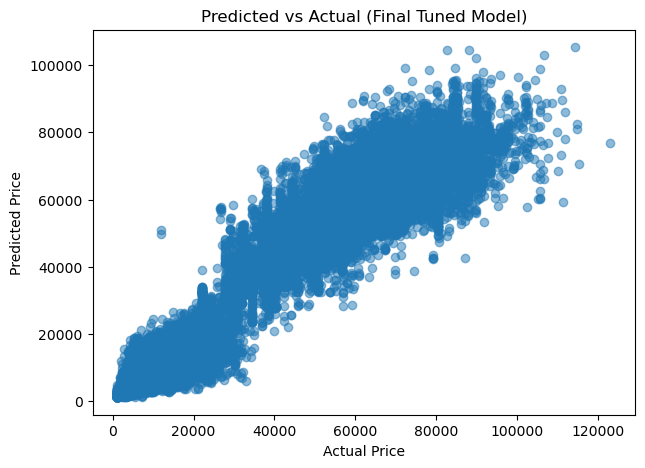

In [13]:
# -----------------------------
# 11. Plot Predicted vs Actual (Final Model)
# -----------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (Final Tuned Model)")
plt.show()